
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Refresher Course on Matrix Analysis and Optimization</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> <a href="https://ljk.imag.fr/membres/Jerome.Malick/" style="font-size: 16px; font-weight: bold">Jérôme Malick</a><br/> 2017/2018 </td>
</tr>
</table>


<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 2 - Refresher Course </a></center>

<br/>

# ``2. Numerical Optimization``

---

<a href="#style"><b>Package check and Styling</b></a><br/><br/><b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; a) <a href="#OGrad"> the Gradient Method </a><br/>&nbsp;&nbsp;&nbsp; b) <a href="#ORef"> Application to Regression </a><br/>&nbsp;&nbsp;&nbsp; c) <a href="#OAda"> an Adaptive Gradient Algorithm </a><br/>&nbsp;&nbsp;&nbsp; d) <a href="#OCla"> Application to Classification </a><br/>&nbsp;&nbsp;&nbsp; e) <a href="#ONew"> Newton's Algorithm </a><br/>&nbsp;&nbsp;&nbsp; f) <a href="#OFur"> To go Further </a><br/>

## <a id="OGrad"> a) the Gradient Method </a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We consider two $\mathbb{R}^2 \to \mathbb{R}$ convex functions with the same global minimizer $(3,1)$ but quite different *shapes* and see how this impacts the performance of gradient-based algorithms. The considered functions $f$ and $g$ and their 3D are:

<table>
<tr>
<th>\begin{array}{rrcll}
f: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & 4 (x_1-3)^2 + 2(x_2-1)^2
\end{array}</th>
<th> \begin{array}{rrcll}
g: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & \log( 1 + \exp(4 (x_1-3)^2 ) + \exp( 2(x_2-1)^2 ) ) - \log(3) .
\end{array} </th>
</tr>
<td> <img src="img/simple.png" alt="f" />  </td>
<td> <img src="img/harder.png" alt="f" /> </td>
</tr>
</table>



**Note:** For convenience, we provide custom plotting functions in <tt>lib/custom_plot_lib.py</tt>  

In [14]:
from lib.custom_plot_lib import *
import numpy as np
# from math import log, exp

<div class="exo"> <b>Question 1:</b> Observe how is written the function <tt>f</tt> that return $f(x)$ from input vector $x$. Observe the 3D plot and level plot with <tt>custom_3dplot...</tt> and <tt>level_plot...</tt>. Do the same for  function <tt>g</tt>.</div>

In [15]:
# f
def f(x):
    """
    Function f
    """
    x1 = x[0]
    x2 = x[1]
    return 4*(x1-3)**2+2*(x2-1)**2

f_plot_param  = {'x1_min' : -0.5, 'x1_max' : 5.5,
                 'x2_min' : -0.5, 'x2_max' : 5.5,
                 'nb_points' : 200,
                 'v_min' : 0, 'v_max' : 80, 'levels' : [0.5,1,2,5,10,15],
                 'title' : 'f: a simple function' }


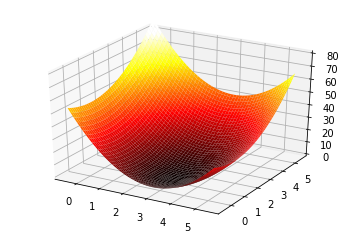

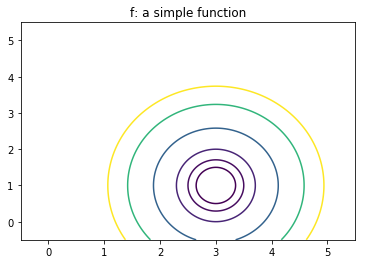

In [16]:
custom_3dplot( f, f_plot_param )
level_plot( f, f_plot_param )

In [21]:
def g(x):
    x1 = x[0]
    x2 = x[1]
    return np.log(1 + np.exp(4 * (x1 - 3)**2) + np.exp(2 * (x2 - 1)**2)) - np.log(3)

g_plot_param  = {'x1_min' : -0.5, 'x1_max' : 5.5,
                 'x2_min' : -0.5, 'x2_max' : 5.5,
                 'nb_points' : 500,
                 'v_min' : 0, 'v_max' : 100, 'levels' : [0.5,1,2,5,10,15],
                 'title' : 'f: a harder function' }


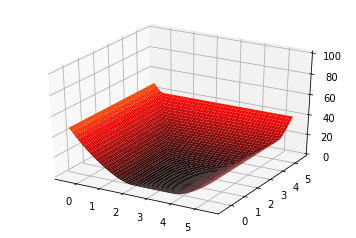

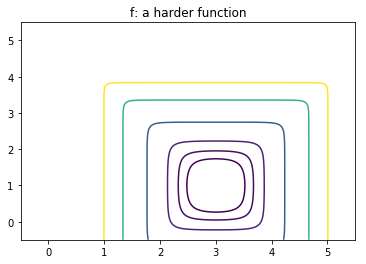

In [22]:
custom_3dplot( g, g_plot_param )
level_plot( g, g_plot_param )

<div class="exo"> <b>Question 2:</b>  Fill the function <tt>f_grad</tt> that return $\nabla f(x)$ from input vector $x$. Do the same for  function <tt>g_grad</tt>.</div>

In [23]:
def f_grad(x): # ...................................
    x1 = x[0]
    x2 = x[1]
    g = np.array( [ 8 * x1 - 24, 4 * x2 - 4  ] )
    return g
####

In [24]:
def g_grad(x): # ...................................
    x1 = x[0]
    x2 = x[1]
    denom = 1 / (1 + np.exp(4 * (x1 - 3)**2) + np.exp(2 * (x2 - 1)**2))
    g1 = denom * (8 * x1 - 24) * np.exp(4 * (x1 - 3)**2)
    g2 = denom * (4 * x2 - 4) * np.exp(2 * (x2 - 1)**2)
    g = np.array( [ g1, g2  ] )
    return g
####

<div class="exo"> <b>Question 3:</b>  implement a constant stepsize gradient method <tt>gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX )</tt> that takes:
<ul>
<li> <tt>f</tt> and <tt>f_grad</tt>: respectively functions and gradient simulators;</li>
<li> <tt>x0</tt>: starting point;</li>
<li> <tt>step</tt>: a stepsize;</li>
<li> <tt>PREC</tt> and <tt>ITE_MAX</tt>: stopping criteria for sought precision and maximum number of iterations;</li>
</ul>

and return <tt>x</tt>, the final value, and <tt>x_tab</tt>, the matrix of all vectors stacked vertically.</div>

In [34]:
def gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX ): # .......................................
    x = np.copy(x0)
    x_tab = np.copy(x)

    i = 0
    fx_prev = f(x)
    while i < ITE_MAX:
        x = x - step * f_grad(x)
        fx = f(x)
        x_tab = np.vstack((x_tab, x))

        if np.abs(fx - fx_prev) < PREC:
            break
        fx_prev = fx
        i += 1
        print(i, end=' ')

    return x,x_tab

<div class="exo"> <b>Question 4:</b> Test your gradient descent function on $f$ and $g$: i) Verify that the final point is close to the sought minimizer $(3,1)$; ii) observe the behavior of the iterates with <tt>level_points_plot</tt>. Change the stepsize and give the values for which the algorithm (i) diverges and (ii) oscillates. Compare with theoretical limits by computing the Lipschitz constant of the gradients.</div>

1 2 3 4 5 6 7 8 9 10 11 12 

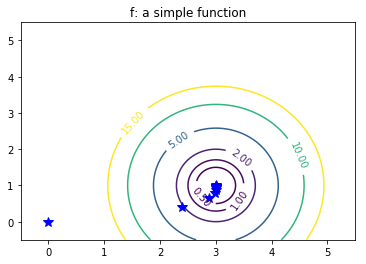

In [46]:
step =  .1 # .........................
PREC = 1e-5 # .........................
ITE_MAX = 100 # .........................
x0 = np.array([0,0]) # .........................

x,x_tab = gradient_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX )
level_points_plot( f , x_tab , f_plot_param )

### 1 -> diverge
### .2 -> oscillate a bit, but get there after 15 iter
### .1 -> converge, 12 iter
### .01 -> converge slowly
### .001 -> converge too slowly

In [ ]:
step =  .25 # .........................
PREC = 1e-5 # .........................
ITE_MAX = 200 # .........................
x0 = np.array([0,0]) # .........................

x,x_tab = gradient_algorithm(g , g_grad , x0 , step , PREC , ITE_MAX )
level_points_plot( g , x_tab , g_plot_param )
### 1 -> diverge
### .2 -> oscillate a bit, 18 iter only
### .1 -> converge, 32 iter
### .01 -> converge slowly, but will get there
### .001 -> converge too slowly

## <a id="ORef"> b) Application to Regression </a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We now get back to the problem of predicting the final grade of a student from various features treated in the Matrix part of the course.

We remind that mathematically, from the $m_{learn}  \times (n+1)$  *learning matrix* $A_{learn}$
($m_{learn} = 300$, $n=27$)  comprising of the features values of each training student in line, and the vector of the values of the target features $b_{learn}$;  we seek a size-$(n+1)$ *regression vector* that minimizes the squared error between  $A_{learn} x$ and $b_{learn}$. This problem boils down to the following least square problem:
$$ \min_{x\in\mathbb{R}^{n+1}} s(x) =  \frac{1}{2} \|  A_{learn} x - b_{learn} \|_2^2 . $$

<div class="exo"> <b>Question 1:</b> Construct the suitable function $s$ and gradient simulator as in the previous section.
</div>

<div class="exo"> <b>Question 2:</b> Compute the Lipschitz constant of the gradient of $s$. Find a solution to the minimization of $s$ using your gradient algorithm. Compare with Numpy's Least Square routine.
</div>

<div class="exo"> <b>Question 3:</b> Generate a random Gaussian matrix/vector couple $A,b$ with increasing size. Create simulators to compare the execution time of constant stepsize gradien and pseudo-inverse computation \emph{via} SVD on the least squares problem $\min_x \|Ax-b\|_2^2$. Notably change the *shape* of $A$ from *tall* (nb. of rows $>\!>$ nb. of cols.) to *fat* (nb. of rows $<\!<$ nb. of cols.).
</div>

## <a id="OAda"> c) an Adaptive Gradient Algorithm </a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


The *Rosenbrock* function $r$ writes 
<table>
<tr>
<th>\begin{array}{rrcll}
r: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  (1-x_1)^2 + 100(x_2-x_1^2)^2 .
\end{array}</th>
</tr>
<td> <img src="img/rosenbrock.png" alt="f" />  </td>
</tr>
</table>

<div class="exo"> <b>Question 1:</b> Fill the functions <tt>r</tt> that return $r(x)$ from input vector $x$; and <tt>r_grad</tt> that return $\nabla r(x)$ from input vector $x$. Observe the 3D plot and level plot of the function.
</div>

In [ ]:
##### Definition of function r
def r(x):
    """ Rosenbrock."""
    x1 = x[0]
    x2 = x[1]
    return (1-x1)**2+100*(x2-x1**2)**2



r_plot_param  = {'x1_min' : -1.5, 'x1_max' : 1.55,
                 'x2_min' : -0.2, 'x2_max' : 1.5,
                 'nb_points' : 200,
                 'v_min' : 0, 'v_max' : 120, 'levels' : [0.05,1,5,15,50,200],
                 'title' : 'r: Rosenbrock function' }

In [ ]:
custom_3dplot( r,r_plot_param)
level_plot( r, r_plot_param)

In [ ]:
def r_grad(x): # .........................
    g = np.array( [ 0.0  ,  0.0  ] )
    return g

<div class="exo"> <b>Question 2:</b> Try to minimize $r$ using your constant stepsize gradient function <tt>gradient_algorithm</tt>. Can you find a stepsize for which the algorithm converges?
</div>

<div class="exo"> <b>Question 3:</b> Implement an *adaptive* stepsize gradient method <tt>gradient_adaptive_algorithm(f , f_grad , x0 , step , PREC , ITE_MAX )</tt> that takes the same inputs and returns the same as the gradient method but implements a *stepsize adaptation method*. For instance, one can use this rule:
\begin{align*}
\mathbf{if} f(x_{k+1})>f(x_k)&:\\
x_{k+1} &= x_k\\
step &= step/2
\end{align*}
which halves the stepsize if a gradient step makes the functional value increase.<br/>

Test your method on $r$: i) Verify that the final point is close to the sought minimizer $(1,1)$; ii) observe the behavior of the iterates with <tt>level_points_plot</tt>. 
</div>

In [ ]:
step =  0 # .........................
PREC = 1e-5 # .........................
ITE_MAX = 10 # .........................
x0 = np.array([0,0]) # .........................

x,x_tab = gradient_adaptive_algorithm(r , r_grad , x0 , step , PREC , ITE_MAX )
#level_points_plot( r , x_tab , r_plot_param)

## <a id="OCla"> d) Application to Classification </a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



Binary classification is another popular problem in machine learning. Instead of predicting a numerical value, the goal is now to classify the student into two classes: $+1$ -- *pass* i.e. final grade $\geq 10$; and $-1$ -- *fail*. To this purpose, we create a class vector $c_{learn}$  from the observation vector $b_{learn}$ by simply setting $c_{learn}(i) = +1 $ if  $b_{learn}(i)\geq10$ and $-1$ otherwise. Then, the most common approach is to minimize the logistic loss regularized by a squared norm:
\begin{equation}
\min_{x\in\mathbb{R}^{n+1}}  \ell(x) = \sum_{i=1}^{m_{learn} } \log\left( 1 + \exp\left( -c_{learn}(i) a_i^{\mathrm{T}}  x   \right) \right)  + \frac{1}{m}\|x\|^2
\end{equation}
where $a^\mathrm{T}_i$ is the $i$-th row of $A_{learn}$.

Then, from a solution $x^\star$ of this problem, one can classify a new example, represented by its feature vector $a$, as such: the quantity $p(a) = \frac{1}{1+\exp(- a^\mathrm{T} x^\star)}$ estimates the probability of belonging to class $1$; thus, one can decide class $+1$ if for instance $ p(a) \geq 0.5$; otherwise, decide class $-1$.

<div class="exo"> <b>Question 1:</b> Compute the gradient of $q(t)  = \log(1+\exp(t))$. Is the function is convex? Deduce that $\ell$ is convex and its gradient.
</div>

<div class="exo"> <b>Question 2:</b> Construct the suitable function and gradient simulators in order to use your <tt>gradient_adaptive_algorithm</tt> to minimize $\ell$.
</div>

<div class="exo"> <b>Question 3:</b> From a final point of the optimization algorithm above, generate a decision vector corresponding to the testing set $A_{test}$. Evaluate the classification error.
</div>

## <a id="ONew"> e) Newton's Algorithm </a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

<div class="exo"> <b>Question 1:</b> Fill the function <tt>f_grad_hessian</tt> that return $\nabla f(x)$ and $H_f(x)$ from input vector $x$. Same thing for $g$.
</div>

In [ ]:
def f_grad_hessian(x): # ...................................
    g = np.array( [ 0.0  ,  0.0  ] )
    H = np.array(  [ ( 0.0 , 0.0 )  ,  ( 0.0 , 0.0 )  ]  )
    return g,H
####

In [ ]:
def g_grad_hessian(x): # ...................................
    g = np.array( [ 0.0  ,  0.0  ] )
    H = np.array(  [ ( 0.0 , 0.0 )  ,  ( 0.0 , 0.0 )  ]  )
    return g,H
####

<div class="exo"> <b>Question 2:</b> Implement Newton's method in <tt>newton_algorithm(f , f_grad_hessian , x0 , PREC , ITE\_MAX )</tt> that takes as an input:
<ul>
<li> <tt>f</tt> and <tt>f_grad_hessian</tt>: respectively functions and gradient + Hessian simulators;
<li> <tt>x0</tt>: starting point;</li>
<li> <tt>PREC</tt> and <tt>ITE_MAX</tt>: stopping criteria for sought precision and maximum number of iterations;</li>
</ul>
<tt>x</tt> the final value, and <tt>x_tab</tt>, the matrix of all vectors stacked vertically.
</div>

In [ ]:
def newton_algorithm(f , f_grad_hessian , x0 , PREC , ITE_MAX ): # .......................................
    x = np.copy(x0)
    x_tab = np.copy(x)

    return x,x_tab

<div class="exo"> <b>Question 3:</b> Test your method on $f$ and $g$: i) Verify that the final point is close to the sought minimizer $(3,1)$; ii) observe the behavior of the iterates with <tt>level_points_plot</tt>.  


Compare graphically constant stepsize gradient and Newton's algorithms with <tt>level_2points_plot</tt>. <br/>


Newton's algorithm should take exactly one iteration to converge for function $f$. Why so? Is it the case for function $g$?
</div>

<div class="exo"> <b>Question 4:</b> Compare Newton method with the adaptive gradient in the case of the classification problem
</div>

## <a id="OFur"> f) To go Further </a>  

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>



We introduce two functions:

<table>
<tr>
<th>\begin{array}{rrcll}
t: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & (0.6 x_1 + 0.2 x_2)^2 \left((0.6 x_1 + 0.2 x_2)^2 - 4 (0.6 x_1 + 0.2 x_2)+4\right) \\
&            &         & + (-0.2 x_1 + 0.6 x_2)^2
\end{array}</th>
<th> \begin{array}{rrcll}
p: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  \left| x_1-3 \right|  + 2\left| x_2-1\right| 
\end{array} </th>
</tr>
<td> <img src="img/poly.png" alt="f" />  </td>
<td> <img src="img/two_pits.png" alt="f" /> </td>
</tr>
</table>



<div class="exo"> <b>Question:</b> Test adaptive gradient methods on these functions from different starting points. What do you observe?
</div>

---
<div id="style"></div>
### Package Check and Styling


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


In [ ]:
import lib.notebook_setting as nbs

packageList = ['IPython', 'numpy', 'scipy', 'matplotlib', 'cvxopt']
nbs.packageCheck(packageList)

nbs.cssStyling()